In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import pickle
import pandas as pd
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
import matplotlib.pyplot as plt
from ml_utilities.torch_models.fc import FC
from erank.utils import load_model_from_epoch, load_directions_matrix_from_task_sweep, load_multiple_dir_matrices_from_sweep
from erank.plot import plot_models_erank
from erank.analyses import create_model_erank_df

gpu_id = 0

## Erank plots

### Create model dict

In [2]:
num_vectors=360
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.2.0_lenet_rotated-rot-XXX_221013_172258'
sweep_lenet = Path(sweep_dir) / 'outputs'
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.3.0_rotated-rot-XXX_221013_173642'
sweep_conv4 = Path(sweep_dir) / 'outputs'

In [3]:
# check for missing best_epoch_files
sweep_output_path = sweep_conv4
for p in sweep_output_path.iterdir():
    bepf = p / 'best_epoch.txt'
    if not bepf.exists():
        print(str(p))

In [5]:
# load lenet
lenet_mat = load_directions_matrix_from_task_sweep(sweep_lenet, device='cpu')

Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.2.0_lenet_rotated-rot-XXX_221013_172258/outputs/mnist-11.2.0_lenet_rotated-rot-99.77715877437325-seed0_221013_172352: 100%|██████████| 360/360 [00:15<00:00, 22.57it/s] 


In [6]:
# load conv4
conv4_mat = load_directions_matrix_from_task_sweep(sweep_conv4, device='cpu')

Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.3.0_rotated-rot-XXX_221013_173642/outputs/mnist-11.3.0_rotated-rot-99.77715877437325-seed0_221013_191354: 100%|██████████| 360/360 [00:25<00:00, 14.05it/s] 


In [7]:
# model dict
model_dict_lenet = {'lenet': lenet_mat}
model_dict_conv4= {'conv4': conv4_mat}

In [8]:
# load init models
lenet_init_model_path = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.2.0_lenet_rotated-rot-XXX_221013_172258/outputs/mnist-11.2.0_lenet_rotated-rot-0.0-seed0_221013_173632'
conv4_init_model_path = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.3.0_rotated-rot-XXX_221013_173642/outputs/mnist-11.3.0_rotated-rot-0.0-seed0_221013_193338'
lenet_init_model = load_model_from_epoch(lenet_init_model_path, epoch=0, device='cpu')
conv4_init_model = load_model_from_epoch(conv4_init_model_path, epoch=0, device='cpu')
init_model_dict = {'lenet': lenet_init_model, 'conv4': conv4_init_model}

In [6]:
# load a model
# run = next(iter(sweep_output_path.iterdir()))
# init_model = load_model_from_epoch(run, epoch=0, device='cpu')

In [7]:
# load model matrices
# model_dict = load_multiple_dir_matrices_from_sweep(path_to_runs=sweep_output_path,
#                                                    name_run_glob_pattern_dict=sine_task_distr,
#                                                    num_runs=num_vectors,
#                                                    device='cpu')
# with open(f'model_dict_num_vecs{num_vectors}.p', 'wb') as savefile:
#     pickle.dump(model_dict, savefile, protocol=pickle.HIGHEST_PROTOCOL)

False

### Load model dict

In [8]:
# model_dict_path = './../tmp/erank_plots/model_dict_num_vecs1900.p'
# model_dict_path = Path(model_dict_path)
# init_model_path = './../tmp/erank_plots/init_model.p'
# init_model_path = Path(init_model_path)

In [9]:
# # load init model
# init_model = FC.load(init_model_path, device=gpu_id)
# init_model, init_model.device

(FC(
   (fc): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=1, out_features=40, bias=True)
     (2): ReLU(inplace=True)
     (3): Linear(in_features=40, out_features=40, bias=True)
     (4): ReLU(inplace=True)
     (5): Linear(in_features=40, out_features=1, bias=True)
   )
 ),
 device(type='cuda', index=0))

In [10]:
# unpickle model dict
# with open(model_dict_path, 'rb') as loadfile:
#     model_dict = pickle.load(loadfile)

In [11]:
# list(model_dict.keys()), type(model_dict)

(['normal#*ampl-0.1_5.0-ph-0_3.141592654*',
  'wide#*ampl-0.1_10.0-ph-0_3.141592654*',
  'narrow#*ampl-0.1_2.5-ph-0_1.5*',
  'almost_point#*ampl-1.0_1.1-ph-0_0.1*'],
 dict)

### Erank Plot Fully Connected

In [25]:
erank_df = create_model_erank_df(models=model_dict_lenet, random_init_model=init_model_dict['lenet'], device=gpu_id)

Calculate eranks: 100%|██████████| 37/37 [00:07<00:00,  4.66it/s]


In [14]:
# erank_df.to_pickle('./erank_df.p')

In [15]:
# erank_df = pd.read_pickle('./../tmp/erank_plots/erank_df.p')

In [21]:
column_name_to_plot_kwargs = {'lenet': {'label': 'lenet-300-100', 'color':'#955196'},
                              'Random model initializations': {'label': 'Random model initializations', 'color':'#444e86'}, 
                              'Gaussian random': {'label': 'Gaussian random vectors', 'color':'#003f5c'}, 
                              }

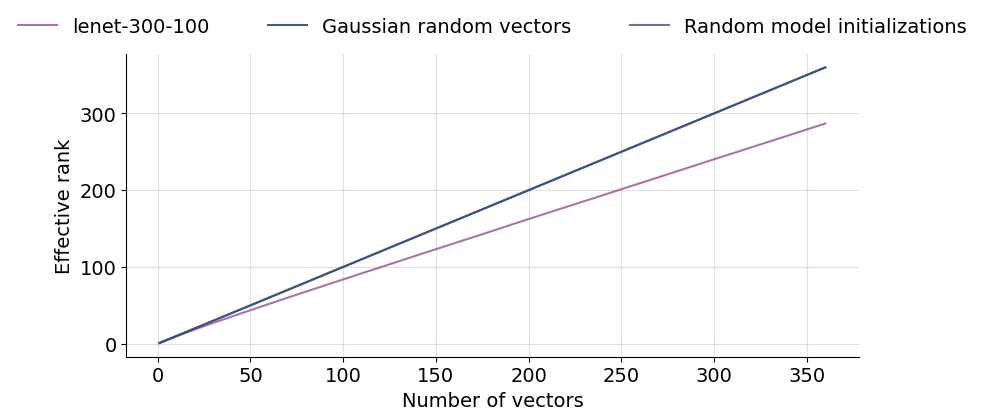

In [32]:
# import os
# from matplotlib import rc
# os.environ["PATH"] = "/usr/local/texlive/2022/bin/x86_64-linux/" + os.pathsep + os.environ["PATH"] 
# rc('text', usetex=True)
# plt.rcParams.update({'font.size': 14})
fig, ax = plot_models_erank(erank_df=erank_df, column_name_to_plot_kwargs=column_name_to_plot_kwargs, legend_columns=3, columnspacing=3.0)

In [33]:
fig.savefig(f'lenet_erank_rotated_mnist_rot0_180.png', dpi=300, bbox_inches='tight')

### Erank Plot Conv4

In [10]:
erank_df = create_model_erank_df(models=model_dict_conv4, random_init_model=init_model_dict['conv4'], device=gpu_id)

Generate random initializations:   0%|          | 0/360 [00:14<?, ?it/s]


AttributeError: 'Sequential' object has no attribute 'reset_parameters'

In [ ]:
# erank_df.to_pickle('./erank_df.p')

In [ ]:
# erank_df = pd.read_pickle('./../tmp/erank_plots/erank_df.p')

In [ ]:
column_name_to_plot_kwargs = {'covn4': {'label': 'conv4', 'color':'#955196'},
                              'Random model initializations': {'label': 'Random model initializations', 'color':'#444e86'}, 
                              'Gaussian random': {'label': 'Gaussian random vectors', 'color':'#003f5c'}, 
                              }

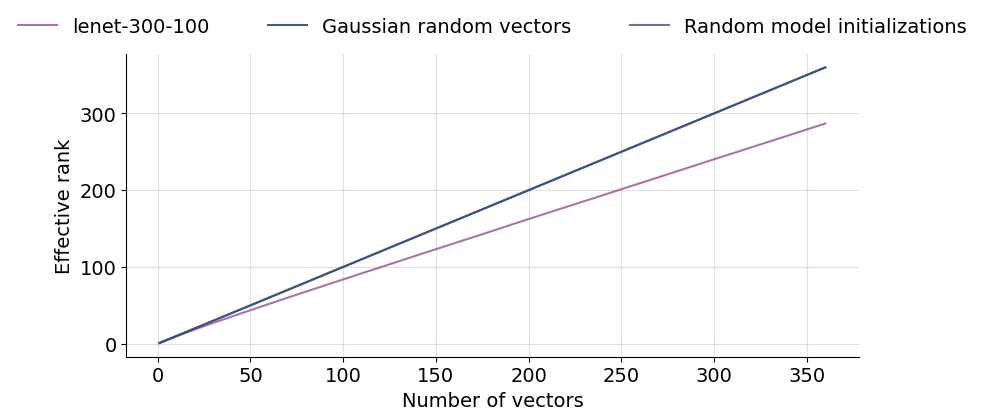

In [ ]:
# import os
# from matplotlib import rc
# os.environ["PATH"] = "/usr/local/texlive/2022/bin/x86_64-linux/" + os.pathsep + os.environ["PATH"] 
# rc('text', usetex=True)
# plt.rcParams.update({'font.size': 14})
fig, ax = plot_models_erank(erank_df=erank_df, column_name_to_plot_kwargs=column_name_to_plot_kwargs, legend_columns=3, columnspacing=3.0)

In [ ]:
fig.savefig(f'lenet_erank_rotated_mnist_rot0_180.png', dpi=300, bbox_inches='tight')